<a href="https://colab.research.google.com/github/VatsalyaBetala/LifeExpectancy-Analysis/blob/main/Project14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project 14: Life Expectancy Analysis


### Context

The term **Life Expectancy** refers to the number of years a person can expect to live. It is based on an estimate of the average age of a population when they die. Life expectancy is one of the key metrics used for assessing the overall health of a population.

 The Global Health Observatory (GHO) data repository under the World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries. The data-sets are made available to the public to perform health data analysis. It has been observed that in the past 15 years, there is a huge development in the health sector resulting in the improvement of human mortality rates. The increases are nearly universal, from the richest to the poorest countries. Let's dive deeper into the life expectancy dataset and find out how different factors influence your life expectancy.




---

### Problem Statement

As the head of a leading life insurance company, your job is to formulate  global health insurance coverage plans and devise different life insurance solutions for different countries. For this, you need to obtain insightful trends and patterns in people's dying age across different countries. Also, you need to determine the factors that affect the average life expectancy of the people around the world to determine the premium rates for insurance policies.

---

---

### Data Description

This dataset contains life expectancy data and health factors for 193 countries from the year 2000-2015 which was collected from the WHO data repository website and its corresponding economic data was collected from the United Nation website. It consists of 22 columns and 2938 rows.

|Field|Description|
|---:|:---|
|Country|Country|
|Year|Year|
|Status|Developed or Developing|
|Life expectancy|Life Expectancy in years|
|Adult Mortality|Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)|
|infant deaths|Number of Infant Deaths per 1000 population|
|Alcohol|Alcohol, recorded per capita (15+) consumption|
|percentage expenditure|Expenditure on health as a percent of GDP per capita (%)|
|Hepatitis B|Hepatitis B (HepB) immunization coverage among 1-year-olds (%)|
|Measles|Measles - number of reported cases per 1000 population|
|BMI|Average Body Mass Index of the entire population|
|under-five deaths|Number of under-five deaths per 1000 population|
|Polio|Polio (Pol3) immunization coverage among 1-year-olds (%)|
|Total expenditure|General government expenditure on health (%)|
|Diphtheria|Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)|
|HIV/AIDS|Deaths per 1000 live births HIV/AIDS (0-4 years)|
|GDP|Gross Domestic Product per capita (in USD)|
|Population|Population of the country|
|thinness 1-19 years|Prevalence of thinness among children and adolescents for Age 10 to 19 (%)|
|thinness 5-9 years|Prevalence of thinness among children for Age 5 to 9 (%)|
|Income composition of resources|Productive use of resources|
|Schooling|Number of years of Schooling(years)|

Here's the dataset link:

https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/life-expectancy/life-expectancy.csv

---

### Things To Do

- Rename the columns since most of them contain leading and trailing spaces. Some columns contain a few missing values. Treat them accordingly.

- Find the answer to the following questions:

  1. Is there a rise in the average life expectancy around the world in a period of 15 years, i.e., from 2000 - 2015?

  2. Do developing countries have a lower life expectancy as compared to the developed countries?
  
  3. Calculate how many countries had extremely low life expectancy, i.e., less than 60 years. List those countries.

  4. What are the most critical factors affecting life expectancy?


---

#### 1. Import Modules & Load Dataset

In [ ]:
# Import the required modules and load the dataset.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
life_expect_df = pd.read_csv("https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/life-expectancy/life-expectancy.csv")
life_expect_df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [ ]:
# Get the information on DataFrame.
life_expect_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

**Q:** Which column(s) has/have non-numeric values?

**A:** `Country` and `Status` are the columns that have non-numeric values.

---

#### 2. Renaming Columns

Rename some columns if they contain leading and trailing spaces.

In [ ]:
# Get a list of all the columns before renaming.
life_expect_df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

**Q:** Which columns contain trailing whitespaces (spaces before and after) in their names?

**A:** `'Measles '`, `' BMI '`, `'under-five deaths '`, `'Diphtheria '`, `' HIV/AIDS'`, `' thinness  1-19 years'` and `' thinness 5-9 years'` are the columns contain trailing whitespaces (spaces before and after) in their names.

In [ ]:
# Remove whitespaces from both ends in the column name
columns_rename = ['Life expectancy ', 'Measles ', ' BMI ', 'under-five deaths ', 'Diphtheria ', ' HIV/AIDS', ' thinness  1-19 years', ' thinness 5-9 years']
for i in columns_rename:
  life_expect_df.rename(columns = {i : i.strip(' ')}, inplace = True)

In [ ]:
# Get list of all the columns after renaming.
life_expect_df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

---

#### 3. Treat Null Values

Check for the null values in the DataFrame.


In [ ]:
# Check for the percentage null values in all the columns.
print(f"The percentage of null values in all the columns are as follows: \n{(life_expect_df.isnull().sum() / life_expect_df.shape[0]) * 100}.")

The percentage of null values in all the columns are as follows: 
Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
BMI                                 1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
HIV/AIDS                            0.000000
GDP                                15.248468
Population                         22.191967
thinness  1-19 years                1.157250
thinness 5-9 years                  1.157250
Income composition of resources   

Let's drop all the columns from the DataFrame containing more than 15% percent of the missing values.

**Q:** Which columns need to be dropped?

**A:**`Hepatitis B`, `GDP` and `Population` are the columns from the DataFrame containing more than 15% of the missing values.

In [ ]:
# List of columns containing more than 15% of the missing values.
for i in life_expect_df:
  if (life_expect_df[i].isnull().sum() / life_expect_df.shape[0]) * 100 > 15:
    print(i)

Hepatitis B
GDP
Population


In [ ]:
# Drop the columns containing more than 15% of the missing values.
life_expect_df = life_expect_df.drop(columns = columns_drop)
life_expect_df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,1154,19.1,83,6.0,8.16,65.0,0.1,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,492,18.6,86,58.0,8.18,62.0,0.1,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,430,18.1,89,62.0,8.13,64.0,0.1,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,2787,17.6,93,67.0,8.52,67.0,0.1,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,3013,17.2,97,68.0,7.87,68.0,0.1,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,31,27.1,42,67.0,7.13,65.0,33.6,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,998,26.7,41,7.0,6.52,68.0,36.7,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,304,26.3,40,73.0,6.53,71.0,39.8,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,529,25.9,39,76.0,6.16,75.0,42.1,1.6,1.7,0.427,9.8


Replace the null values with the respective median of the columns.

**Hint:** To replace the null values with their respective median, you can use `fillna()` function. Some of the examples are:

- `df.fillna('0')` $\rightarrow$ Replaces all null values in the DataFrame `df` with `0`.

- `df.fillna('0', inplace = True)` $\rightarrow$ Here the `inplace = True` parameter instructs to replace the null values in-place i.e. directly inside the DataFrame without creating its copy. It is an optional parameter.

- `df['column_name'].fillna(df['column_name'].median(), inplace = True)` $\rightarrow$ Replaces all null values of a column with its median.






In [ ]:
# Get the columns having the null values.
life_expect_df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

Before replacing the null values, let's split our DataFrame into two separate DataFrames based on the development status of the countries.

In [ ]:
# Grouping the DataFrame based on the development status of countries. First get the DataFrame of the developed countries
developed_df = life_expect_df[life_expect_df['Status'] == 'Developed']
developed_df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
112,Australia,2015,Developed,82.8,59.0,1,NaN,0.00000,74,66.6,1,93.0,NaN,93.0,0.1,0.6,0.6,0.937,20.4
113,Australia,2014,Developed,82.7,6.0,1,9.71,10769.36305,340,66.1,1,92.0,9.42,92.0,0.1,0.6,0.6,0.936,20.4
114,Australia,2013,Developed,82.5,61.0,1,9.87,11734.85381,158,65.5,1,91.0,9.36,91.0,0.1,0.6,0.6,0.933,20.3
115,Australia,2012,Developed,82.3,61.0,1,10.03,11714.99858,199,65.0,1,92.0,9.36,92.0,0.1,0.6,0.6,0.930,20.1
116,Australia,2011,Developed,82.0,63.0,1,10.30,10986.26527,190,64.4,1,92.0,9.20,92.0,0.1,0.6,0.6,0.927,19.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2805,United States of America,2004,Developed,77.5,111.0,28,8.48,0.00000,37,63.1,33,92.0,15.14,96.0,0.1,0.7,0.6,NaN,NaN
2806,United States of America,2003,Developed,77.2,114.0,28,8.40,0.00000,56,62.4,33,91.0,15.60,96.0,0.1,0.7,0.6,NaN,NaN
2807,United States of America,2002,Developed,77.0,115.0,28,8.33,0.00000,41,61.7,33,9.0,14.55,94.0,0.1,0.8,0.6,NaN,NaN
2808,United States of America,2001,Developed,76.9,115.0,28,8.25,0.00000,116,6.9,33,89.0,13.73,94.0,0.1,0.8,0.6,NaN,NaN


In [ ]:
# Check for the null values in the developed countries DataFrame
developed_df.isnull().sum()

Country                             0
Year                                0
Status                              0
Life expectancy                     0
Adult Mortality                     0
infant deaths                       0
Alcohol                            28
percentage expenditure              0
Measles                             0
BMI                                 0
under-five deaths                   0
Polio                               0
Total expenditure                  32
Diphtheria                          0
HIV/AIDS                            0
thinness  1-19 years                0
thinness 5-9 years                  0
Income composition of resources    48
Schooling                          48
dtype: int64

In [ ]:
# Get the columns having the null values in the developed countries DataFrame
null_columns = []
for i in developed_df.columns:
  if developed_df[i].isnull().sum() > 0:
    null_columns.append(i)
null_columns

['Alcohol',
 'Total expenditure',
 'Income composition of resources',
 'Schooling']

In [ ]:
# Get a descriptive statistics summary of the columns having the null values in the developed countries DataFrame
for i in null_columns:
  print(developed_df[i].describe())

count    484.000000
mean       9.826736
std        2.765858
min        0.010000
25%        8.617500
50%       10.320000
75%       11.697500
max       15.190000
Name: Alcohol, dtype: float64
count    480.000000
mean       7.554042
std        2.984389
min        1.100000
25%        6.407500
50%        7.895000
75%        9.212500
max       17.600000
Name: Total expenditure, dtype: float64
count    464.000000
mean       0.852489
std        0.052843
min        0.703000
25%        0.815000
50%        0.862000
75%        0.894000
max        0.948000
Name: Income composition of resources, dtype: float64
count    464.000000
mean      15.845474
std        1.766799
min       11.500000
25%       14.700000
50%       15.800000
75%       16.800000
max       20.700000
Name: Schooling, dtype: float64


In [ ]:
# Replace the missing values of the developed countries DataFrame with the median value of the respective columns.
for i in null_columns:
  developed_df[i].fillna(developed_df[i].median(), inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
# Again get a descriptive statistics summary of the columns having null values in the developed countries DataFrame.
# This is done to verify that the replaced values did not disrupt the data
for i in null_columns:
  print(developed_df[i].describe())

count    512.000000
mean       9.853711
std        2.691356
min        0.010000
25%        8.740000
50%       10.320000
75%       11.582500
max       15.190000
Name: Alcohol, dtype: float64
count    512.000000
mean       7.575352
std        2.890614
min        1.100000
25%        6.542500
50%        7.895000
75%        9.140000
max       17.600000
Name: Total expenditure, dtype: float64
count    512.000000
mean       0.853381
std        0.050377
min        0.703000
25%        0.819750
50%        0.862000
75%        0.891250
max        0.948000
Name: Income composition of resources, dtype: float64
count    512.000000
mean      15.841211
std        1.681824
min       11.500000
25%       14.800000
50%       15.800000
75%       16.600000
max       20.700000
Name: Schooling, dtype: float64


**Note:** Make sure that there is no major change in the mean, std, min, 25%, 50%, 75% and max values after replacing null values.

In [ ]:
# Again check whether there are any missing values
developed_df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [ ]:
# Get the DataFrame of the developing countries
developing_df = life_expect_df[life_expect_df['Status'] == 'Developing']
developing_df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,1154,19.1,83,6.0,8.16,65.0,0.1,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,492,18.6,86,58.0,8.18,62.0,0.1,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,430,18.1,89,62.0,8.13,64.0,0.1,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,2787,17.6,93,67.0,8.52,67.0,0.1,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,3013,17.2,97,68.0,7.87,68.0,0.1,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,31,27.1,42,67.0,7.13,65.0,33.6,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,998,26.7,41,7.0,6.52,68.0,36.7,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,304,26.3,40,73.0,6.53,71.0,39.8,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,529,25.9,39,76.0,6.16,75.0,42.1,1.6,1.7,0.427,9.8


In [ ]:
# Check for the null values in the developing countries DataFrame
developing_df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            166
percentage expenditure               0
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  194
Diphtheria                          19
HIV/AIDS                             0
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    119
Schooling                          115
dtype: int64

In [ ]:
# Get a descriptive statistics summary of the columns having the null values in the developing countries DataFrame
null_columns1 = []
for i in developing_df.columns:
  if developing_df[i].isnull().sum() > 0:
    null_columns1.append(i)
for i in null_columns1:
  print(developing_df[i].describe())

count    2416.000000
mean       67.111465
std         9.006092
min        36.300000
25%        61.100000
50%        69.000000
75%        74.000000
max        89.000000
Name: Life expectancy, dtype: float64
count    2416.000000
mean      182.833195
std       127.974557
min         1.000000
25%        92.000000
50%       163.000000
75%       253.000000
max       723.000000
Name: Adult Mortality, dtype: float64
count    2260.000000
mean        3.484119
std         3.347537
min         0.010000
25%         0.517500
50%         2.560000
75%         5.750000
max        17.870000
Name: Alcohol, dtype: float64
count    2392.000000
mean       35.435326
std        19.425091
min         1.000000
25%        18.300000
50%        35.200000
75%        53.200000
max        87.300000
Name: BMI, dtype: float64
count    2407.000000
mean       80.170752
std        24.671531
min         3.000000
25%        74.000000
50%        91.000000
75%        97.000000
max        99.000000
Name: Polio, dtype: float64


In [ ]:
# Replace the missing values of the developing countries DataFrame with the median value of the respective columns.
for i in null_columns1:
  developing_df[i].fillna(developing_df[i].median(), inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
# Again get a descriptive statistics summary of the DataFrame to verify that the replaced values did not disrupt the data
for i in null_columns1:
  print(developing_df[i].describe())

count    2426.000000
mean       67.119250
std         8.988318
min        36.300000
25%        61.100000
50%        69.000000
75%        74.000000
max        89.000000
Name: Life expectancy, dtype: float64
count    2426.000000
mean      182.751443
std       127.716744
min         1.000000
25%        92.250000
50%       163.000000
75%       252.750000
max       723.000000
Name: Adult Mortality, dtype: float64
count    2426.000000
mean        3.420886
std         3.239347
min         0.010000
25%         0.580000
50%         2.560000
75%         5.390000
max        17.870000
Name: Alcohol, dtype: float64
count    2426.000000
mean       35.432028
std        19.288454
min         1.000000
25%        18.400000
50%        35.200000
75%        53.075000
max        87.300000
Name: BMI, dtype: float64
count    2426.000000
mean       80.255565
std        24.593231
min         3.000000
25%        74.000000
50%        91.000000
75%        97.000000
max        99.000000
Name: Polio, dtype: float64


In [ ]:
# Again check whether there are any missing values
developing_df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

---

#### 4. Life Expectancy  w.r.t Year

Find out whether the average age of death had increased globally in a period of 15 years i.e. from the year 2000 to 2015. Create a bar plot to depict this relationship.

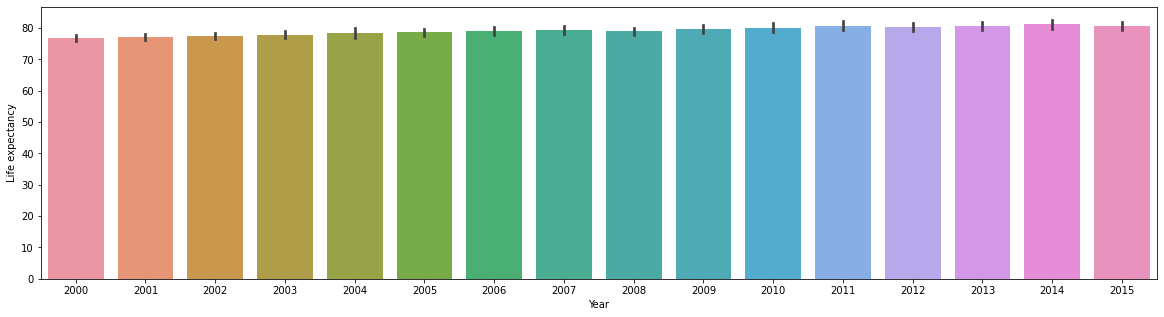

In [ ]:
# Life expectancy w.r.t Year using bar plot for developed countries
plt.figure(figsize = (20, 5))
sns.barplot(x = 'Year', y = 'Life expectancy', data = developed_df)
plt.show()

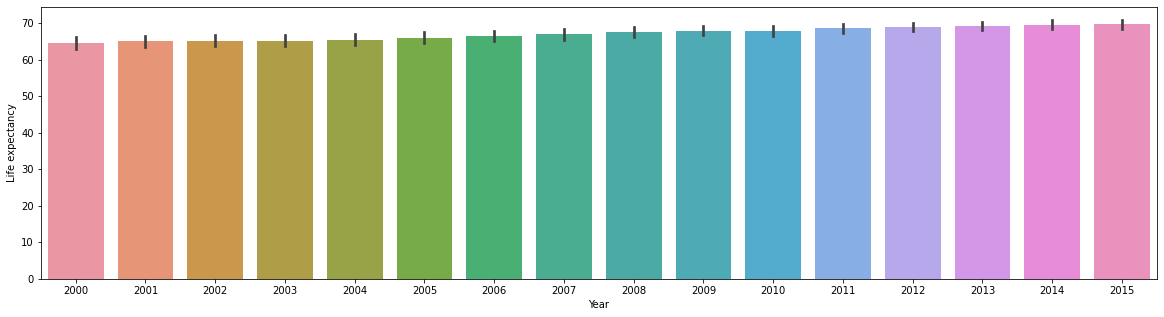

In [ ]:
# Life expectancy w.r.t Year using bar plot for developing countries
plt.figure(figsize = (20, 5))
sns.barplot(x = 'Year', y = 'Life expectancy', data = developing_df)
plt.show()

**Q:** Do you find any increase in the average life expectancy over 15 years?

**A:** Yes, there is an increase in the average life expectancy over 15 years.

**Q:** In which year, the average life expectancy was maximum?

**A:** For developed countries, 2014 has the maximum average life expectancy.
For developing countries, 2015 has the maximum average life expectancy.

---

#### 5. Developing versus Developed Countries

Find out whether the people living in developing countries die early as compared to those living in developed countries.

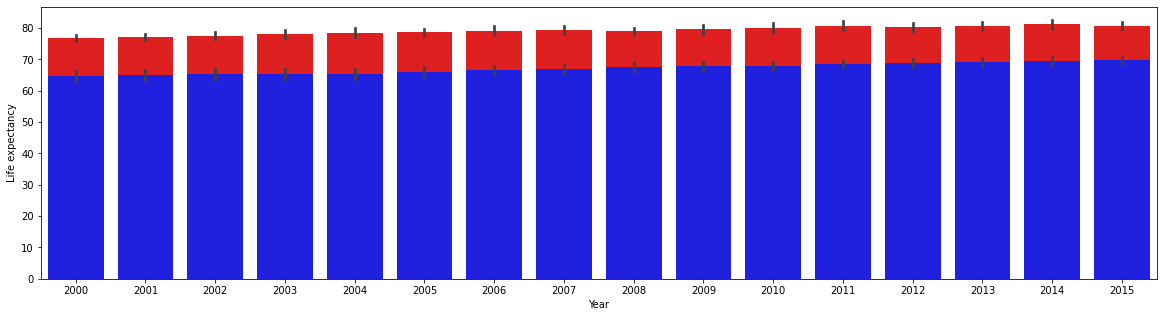

In [ ]:
# Create a barplot for yearly life expectancy of developing and developed countries in a single bar chart.
plt.figure(figsize = (20, 5))
sns.barplot(x = 'Year', y = 'Life expectancy', data = developed_df, color = 'red')
sns.barplot(x = 'Year', y = 'Life expectancy', data = developing_df, color = 'blue')
plt.show()

In [ ]:
# Find the overall average life expectancy of developed and developing countries
developed_avg_life = developed_df['Life expectancy'].mean()
developing_avg_life = developing_df['Life expectancy'].mean()
print(f'The average life expectancy in developed countries is {round(developed_avg_life, 3)}. \nThe average life expectancy in developing countries is {round(developing_avg_life, 2)}.')

The average life expectancy in developed countries is 79.198. 
The average life expectancy in developing countries is 67.12.


**Q:** Is there a huge difference in the average life expectancies of developing and developed countries?

**A:** Yes, there is a difference in the average life expectancies of developing and developed countries by 12% which is really a huge difference.

---

#### 6. Probability Distribution of Life Expectancy

Let us find out how many developing countries had extremely low life expectancy in the year 2015. Perform the following tasks:
- Create a line plot for the life expectancy of developing countries for the year 2015 with life expectancy on the X-axis and their corresponding probability densities on the Y-axis.

- Also, find out how many developing countries had extremely low life expectancy i.e. below 60 in the year 2015. Use $Z$-score and `cdf()` function to find the probability of the random variable $X \le 60$.

- List down the names of the developing countries that had a life expectancy below 60 years in the year 2015.


**Note:** Instead of applying the `cdf()` function, you can also use `integrate` module of the `scipy` package.


In [ ]:
# Create a Python function to calculate the individual probabilities of all the life expectancies
def prob_density_func(array, mean, standard_deviation):
  p = 1 / (standard_deviation * np.sqrt(2 * 3.14))
  exponent = np.exp(-(array - mean) ** 2 / (2 * (standard_deviation ** 2)))
  probability_density = p * exponent
  return probability_density

In [ ]:
# Create a DataFrame of developing countries for year 2015
developing_2015 = developing_df[developing_df['Year'] == 2015]
developing_2015

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,1154,19.1,83,6.0,8.16,65.0,0.1,17.2,17.3,0.479,10.1
16,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,0,58.0,0,99.0,6.00,99.0,0.1,1.2,1.3,0.762,14.2
32,Algeria,2015,Developing,75.6,19.0,21,2.56,0.000000,63,59.5,24,95.0,5.40,95.0,0.1,6.0,5.8,0.743,14.4
48,Angola,2015,Developing,52.4,335.0,66,2.56,0.000000,118,23.3,98,7.0,5.40,64.0,1.9,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,2.56,0.000000,0,47.7,0,86.0,5.40,99.0,0.2,3.3,3.3,0.784,13.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,Venezuela (Bolivarian Republic of),2015,Developing,74.1,157.0,9,2.56,0.000000,0,62.1,10,87.0,5.40,87.0,0.1,1.6,1.5,0.769,14.3
2874,Viet Nam,2015,Developing,76.0,127.0,28,2.56,0.000000,256,17.5,35,97.0,5.40,97.0,0.1,14.2,14.5,0.678,12.6
2890,Yemen,2015,Developing,65.7,224.0,37,2.56,0.000000,468,41.3,47,63.0,5.40,69.0,0.1,13.6,13.4,0.499,9.0
2906,Zambia,2015,Developing,61.8,33.0,27,2.56,0.000000,9,23.4,40,9.0,5.40,9.0,4.1,6.3,6.1,0.576,12.5


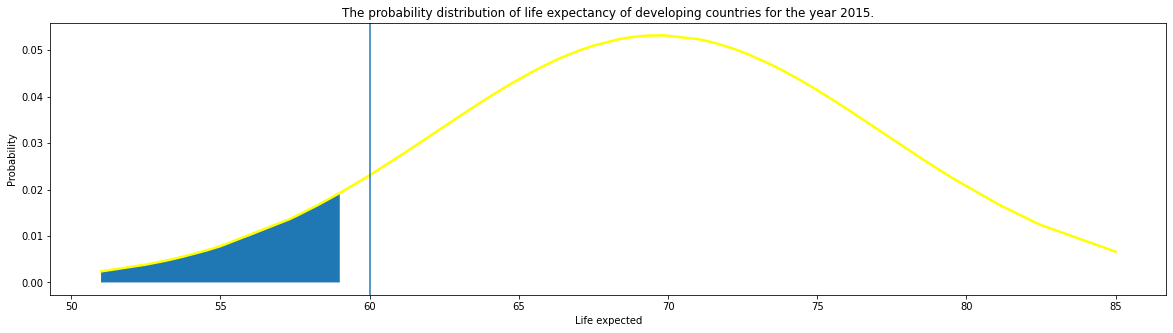

In [ ]:
# Plot the probability distribution of life expectancy of developing countries for the year 2015. Also, fill the area for X < 60.
life_expect_less_60 = developing_2015['Life expectancy']
probs = prob_density_func(np.arange(life_expect_less_60.min(), 60), life_expect_less_60.mean(), life_expect_less_60.std())
rho = prob_density_func(life_expect_less_60.sort_values(), life_expect_less_60.mean(), life_expect_less_60.std())
plt.figure(figsize = (20, 5))
plt.title('The probability distribution of life expectancy of developing countries for the year 2015.')
plt.xlabel('Life expected')
plt.ylabel('Probability')
plt.plot(life_expect_less_60.sort_values(), rho, color = 'yellow', linewidth = 2.5)
plt.fill_between(x = np.arange(life_expect_less_60.min(), 60), y1 = probs)
plt.axvline(x = 60)
plt.show()

In [ ]:
# Calculate Z-score of 60 and find P(X < 60) by applying 'cdf()' function
from scipy.stats import norm
z_score = (60 - life_expect_less_60.mean()) / life_expect_less_60.std()
print(f'The Z-score is {round(z_score, 3)}.')
probability = norm.cdf(z_score)
print(f'The probability is {round(probability, 3)}.')

The Z-score is -1.292.
The probability is 0.098.




**Q:** How much percentage of developing countries had extremely low life expectancy in the year 2015?

**A:** 9.8 percentage of developing countries had extremely low life expectancy in the year 2015.



In [ ]:
# List down the name of the countries having life expectancy below 60 in the year 2015
expectancy = list(zip(list(developing_2015.loc[developing_2015['Life expectancy'] < 60, 'Country']), list(developing_2015.loc[developing_2015['Life expectancy'] < 60, 'Life expectancy'])))
expectancy

[('Angola', 52.4),
 ('Burkina Faso', 59.9),
 ('Burundi', 59.6),
 ("Côte d'Ivoire", 53.3),
 ('Cameroon', 57.3),
 ('Central African Republic', 52.5),
 ('Chad', 53.1),
 ('Democratic Republic of the Congo', 59.8),
 ('Equatorial Guinea', 58.2),
 ('Guinea', 59.0),
 ('Guinea-Bissau', 58.9),
 ('Lesotho', 53.7),
 ('Malawi', 58.3),
 ('Mali', 58.2),
 ('Mozambique', 57.6),
 ('Nigeria', 54.5),
 ('Sierra Leone', 51.0),
 ('Somalia', 55.0),
 ('South Sudan', 57.3),
 ('Swaziland', 58.9),
 ('Togo', 59.9)]

**Q:** Which country had the lowest life expectancy in the year 2015?

**A:**Sierra Leone is the country which had the lowest life expectancy in the year 2015.

---

#### 7. Finding Correlation

Find the columns that are highly correlated with the `Life expectancy` column. For this, calculate the correlation coefficient values between all the columns and then use a heatmap to visualise these correlations.

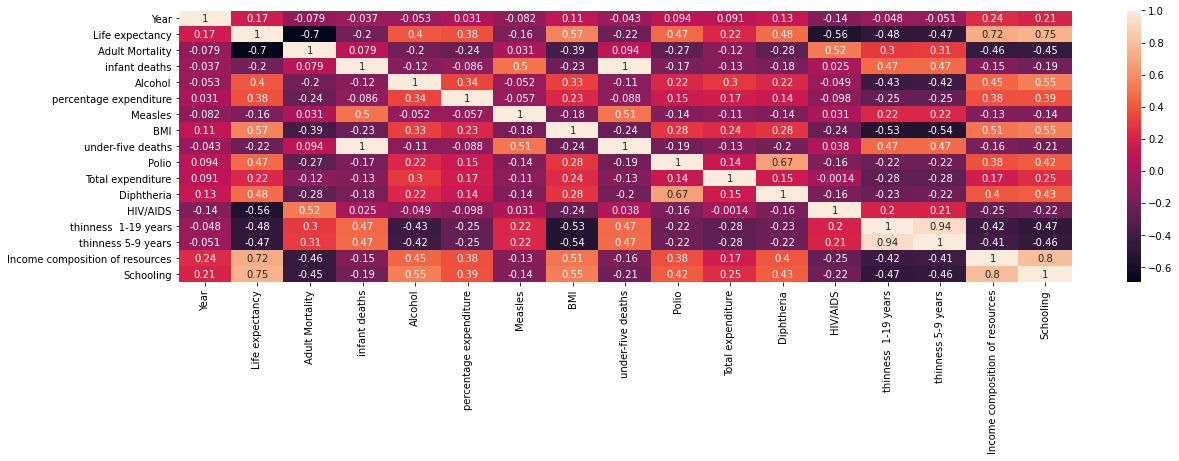

In [ ]:
# calculate correlation coefficient for all columns of the original DataFrame
correlation_df = life_expect_df.corr()
# Use heatmap to observe correlations.
plt.figure(figsize = (20, 5))
sns.heatmap(correlation_df, annot = True)
plt.show()

**Q:** Which attribute(s) have an extremely strong **positive** correlation with `Life expectancy`?

**A:** `Schooling` and `Income composition of resources` have an extremely strong **positive** correlation with `Life expectancy`.


**Q:** Which attribute(s) have an extremely strong **negative** correlation with `Life expectancy`?

**A:** `Adult Mortality` and `HIV/AIDS` have an extremely strong **negative** correlation with `Life expectancy`.



**Q:** By observing the correlation heatmap, find out other attributes or features that are highly correlated with each other (excluding Life expectancy).

**A:**

---

---